In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv(r"C:\Users\JOY\Downloads\archive\Train.csv")
test_df = pd.read_csv(r"C:\Users\JOY\Downloads\archive\Test.csv")

df = pd.concat([train_df,test_df],ignore_index = True)

#df.to_csv("bank.csv",index = False)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB


In [5]:
df.shape

(49732, 17)

In [101]:
for i in df.columns.dtype!='o':
    print(i)

TypeError: 'bool' object is not iterable

In [102]:
df.columns.!='o'

True

In [6]:
df.describe(percentiles = [0.25,0.5,0.75,0.95,0.99])

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
95%,59.000000,5798.450000,29.000000,753.000000,8.000000,317.000000,3.000000
99%,71.000000,13295.450000,31.000000,1268.690000,16.000000,370.000000,8.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Data Understanding¶

        The dataset pertains to direct marketing campaigns conducted by a Portuguese banking institution. These campaigns involved phone calls, often requiring multiple contacts with the same client to determine if they would subscribe to a bank term deposit (indicated as 'yes') or not (indicated as 'no').

Objective:

        The goal is to classify whether a client will subscribe to a term deposit (variable y) based on various features.

Variable Definitions:

        age : Age of bank customers, ranging from 18 to 95.
        job : Type of job (e.g., housemaid, blue-collar, management, retired).
        marital : Marital status (e.g., married, single, divorced).
        education: Education level (e.g., high school, illiterate, university degree).
        default : Indicates if the customer has credit in default.
        balance : Average yearly balance of customers.
        housing : Indicates whether the customer has a housing loan.
        loan : Indicates whether the customer has a personal loan.
        contact : Type of communication used to contact the customer (e.g., cellular, telephone).
        day : Day of the week when the last contact was made(Date).
        month : Month of the last contact..
        duration : Duration of the last call in seconds.
        campaign : Number of contacts made during this campaign for this client (numeric, includes the last contact).
        pdays : Number of days since the client was last contacted in a previous campaign.
        previous : Number of contacts made before this campaign for this client.
        poutcome : Outcome of the previous marketing campaign
        y : Indicates whether the client subscribed to a term deposit (yes/no).f the week

In [7]:
import warnings
warnings.filterwarnings('ignore')

# Converting unknown values and -1 values to NaN values

In [8]:
# Converting the values with -1 value to Null
df.pdays[df.pdays == -1] = np.nan

# Assigning 'NaN' to 'unknown' values to col
col = ['job', 'education', 'contact', 'poutcome']

for column in col:
    df[column].replace('unknown', np.nan, inplace=True)

# Viewing percentage of missing values
print("Percentage of Missing Values")
round((df.isnull().sum()[df.isnull().sum()>0]*100)/df.shape[0],2)

Percentage of Missing Values


job           0.66
education     4.11
contact      28.84
pdays        81.76
poutcome     81.77
dtype: float64

# Dropping Columns More Than 70% null values

In [9]:
# Dropping - 1. pdays & 2. poutcome
df.drop(['pdays','poutcome'] , inplace = True, axis = 1)

# Viewing percentage of missing values
round((df.isnull().sum()[df.isnull().sum()>0]*100)/df.shape[0],2)

job           0.66
education     4.11
contact      28.84
dtype: float64

In [10]:
numerical_columns = df.select_dtypes(include = 'int64').columns
categorical_features = df.select_dtypes(include = 'object').columns

print("Numerical Columns : ",numerical_columns)
print("Categorical Columns : ",categorical_features)

Numerical Columns :  Index(['age', 'balance', 'day', 'duration', 'campaign', 'previous'], dtype='object')
Categorical Columns :  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'y'],
      dtype='object')


In [11]:
for col in categorical_features:
    print(df[col].value_counts(normalize = True)*100)
    print("--------------------------------")

job
blue-collar      21.612760
management       21.104724
technician       16.931142
admin.           11.433834
services          9.251913
retired           5.047970
self-employed     3.566368
entrepreneur      3.349796
unemployed        2.896409
housemaid         2.736510
student           2.068575
Name: proportion, dtype: float64
--------------------------------
marital
married     60.345452
single      28.122738
divorced    11.531811
Name: proportion, dtype: float64
--------------------------------
education
secondary    53.489347
tertiary     30.722614
primary      15.788039
Name: proportion, dtype: float64
--------------------------------
default
no     98.208397
yes     1.791603
Name: proportion, dtype: float64
--------------------------------
housing
yes    55.676426
no     44.323574
Name: proportion, dtype: float64
--------------------------------
loan
no     84.044478
yes    15.955522
Name: proportion, dtype: float64
--------------------------------
contact
cellular     90.937

# Numerical Features Analysys

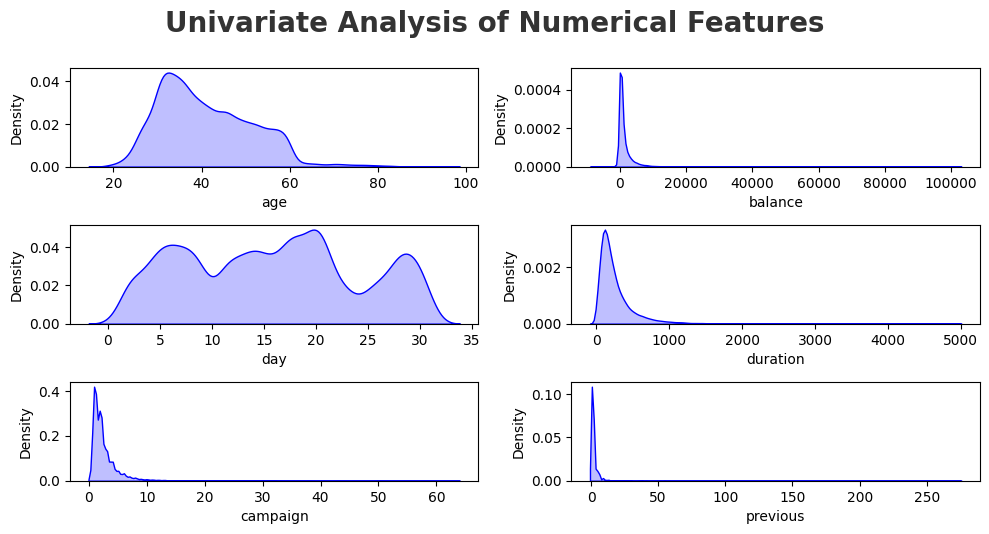

In [12]:
plt.figure(figsize=(10,8))
plt.suptitle("Univariate Analysis of Numerical Features",fontsize = 20,fontweight = 'bold',alpha = 0.8, y = 1.)

for i in range(0,len(numerical_columns)):
    plt.subplot(5,2,i+1)
    sns.kdeplot(x = df[numerical_columns[i]],shade = True,color = 'b')
    plt.xlabel(numerical_columns[i])
    plt.tight_layout()

# Multivariate Analysis

In [13]:
discrete_features = [feature for feature in numerical_columns if len(df[feature].unique())<25]
continious_features = [feature for feature in numerical_columns if len(df[feature].unique())>25]

print(f"we have {len(discrete_features)} discrete features")
print(f"we have {len(continious_features)} continious features: {continious_features}")

we have 0 discrete features
we have 6 continious features: ['age', 'balance', 'day', 'duration', 'campaign', 'previous']


# Check Multicollinearity for Categorical features
 - H0(null hypothesis) -> independent of target variable
 - H1(alternate Hypothesis) -> The Features and Target variable are corelated  

In [14]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df["y"], df[feature]))[1] < 0.05:
        chi2_test.append("Reject Null Hypothesis")

    else:
        chi2_test.append("Fail to reject Null Hypothesis")

result = pd.DataFrame(data = [categorical_features,chi2_test]).T
result.columns = ["Columns","Hypthesis Result"]
result


,Columns,Hypthesis Result
0,job,Reject Null Hypothesis
1,marital,Reject Null Hypothesis
2,education,Reject Null Hypothesis
3,default,Reject Null Hypothesis
4,housing,Reject Null Hypothesis
5,loan,Reject Null Hypothesis
6,contact,Reject Null Hypothesis
7,month,Reject Null Hypothesis
8,y,Reject Null Hypothesis


All The Categorical Features are dependent to the Target Column

# Imputing Missing Values

In [15]:
# Viewing the mode value of the column  3. job
print('Mode for Job column:')
df.job.value_counts()[:1]

Mode for Job column:


job
blue-collar    10678
Name: count, dtype: int64

In [16]:
# Imputing missing values with mode value
df.loc[df['job'].isna() , 'job'] = 'blue-collar'

# Verify
round((df.isnull().sum()[df.isnull().sum()>0]*100)/df.shape[0],2)

education     4.11
contact      28.84
dtype: float64

In [17]:
# Viewing the mode value of the column 4. education
print('Mode for Education column:')
df.education.value_counts()[:1]

Mode for Education column:


education
secondary    25508
Name: count, dtype: int64

In [18]:
# Imputing missing values with mode value
df.loc[df['education'].isna() , 'education'] = 'secondary'

# Verify
round((df.isnull().sum()[df.isnull().sum()>0]*100)/df.shape[0],2)

contact    28.84
dtype: float64

In [19]:
# Viewing the mode value of the column 5. contact
print('Mode for Contact column:')
df.contact.value_counts()[:1]

Mode for Contact column:


contact
cellular    32181
Name: count, dtype: int64

In [20]:
# Imputing missing values with mode value
df.loc[df.contact.isnull(), 'contact'] = 'cellular'

# Verify
round((df.isnull().sum()[df.isnull().sum()>0]*100)/df.shape[0],2)

Series([], dtype: float64)

In [21]:
x = df.drop('y',axis = 1)
y = df['y']
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [22]:
y = np.where(y=="yes",1,0)

y

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
x[continious_features].skew(axis=0, skipna = True)

age          0.686033
balance      8.204429
day          0.093154
duration     3.109530
campaign     4.884266
previous    40.783648
dtype: float64

# Applying Transformmers to check it to reduce the outliers

In [59]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method = 'yeo-johnson')
transform_features = ['balance','age','duration','campaign','previous']
x_copy = pt.fit_transform(x[transform_features])



In [107]:
from bank.utils.main_utils import read_yaml_file

config = read_yaml_file(r"C:\Users\JOY\Desktop\bank_term_deposit_prediction\config\schema.yaml")
num = config['ord_columns']
num

['default', 'housing', 'loan', 'contact', 'month']

In [97]:
l = [list(d.keys())[0] for d in num]

In [98]:
for i in l:
    print(i)

age
balance
day
duration
campaign
previous


In [73]:
x_copy = pd.DataFrame(x_copy,columns = transform_features)

NameError: name 'x_copy' is not defined

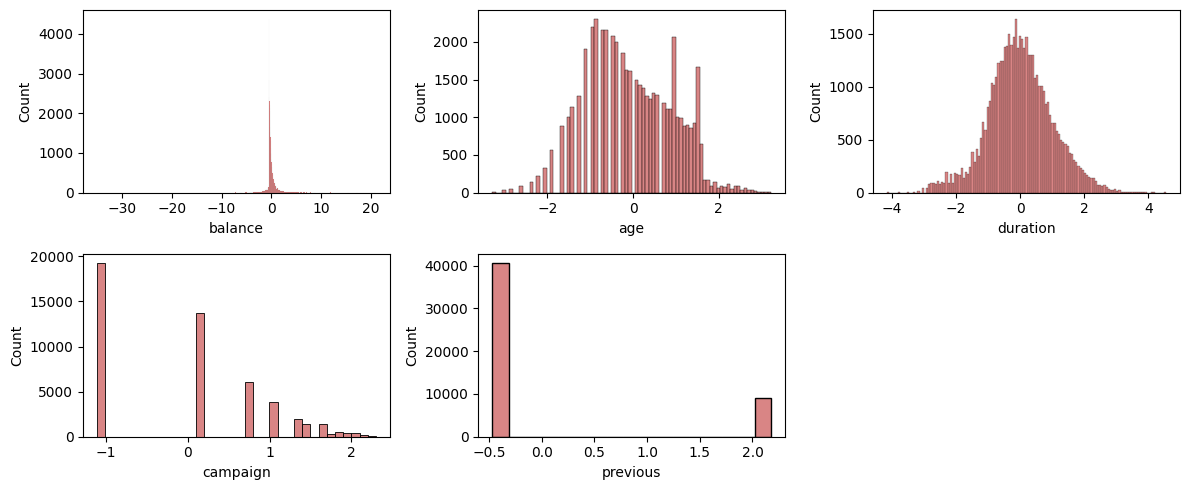

In [61]:
plt.figure(figsize=(12, 5))
for i, col in enumerate(transform_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(x=x_copy[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [62]:
x_copy.skew(axis=0, skipna=True)

balance     1.126183
age         0.008686
duration    0.017596
campaign    0.230920
previous    1.647701
dtype: float64

In [63]:
num_features = list(x.select_dtypes(exclude = 'object').columns)

In [64]:
or_columns = ['default' , 'housing' , 'loan' , 'contact' , 'month']
oh_columns = ['job' , 'marital' , 'education']
transform_columns = ['age' , 'balance' , 'duration' , 'campaign' , 'previous']
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
])


preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, oh_columns),
        ("Ordinal_Encoder", ordinal_encoder, or_columns),
        ("Transformer", transform_pipe, transform_columns),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)


x = preprocessor.fit_transform(x)


In [32]:
x

array([[ 0.        ,  0.        ,  0.        , ...,  0.00896181,
        -0.57003031, -0.25584899],
       [ 0.        ,  0.        ,  0.        , ..., -0.41782396,
        -0.57003031, -0.25584899],
       [ 0.        ,  0.        ,  1.        , ..., -0.70881425,
        -0.57003031, -0.25584899],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.41782396,
         2.6567718 , -0.25584899],
       [ 0.        ,  1.        ,  0.        , ..., -0.50318111,
         0.39801033,  1.07463712],
       [ 0.        ,  0.        ,  1.        , ...,  0.33487093,
        -0.2473501 ,  2.8486186 ]])

In [17]:
#df.to_csv("bank_clean.csv",index = False)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  previous   49732 non-null  int64 
 14  y          49732 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.7+ MB


In [19]:
df["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

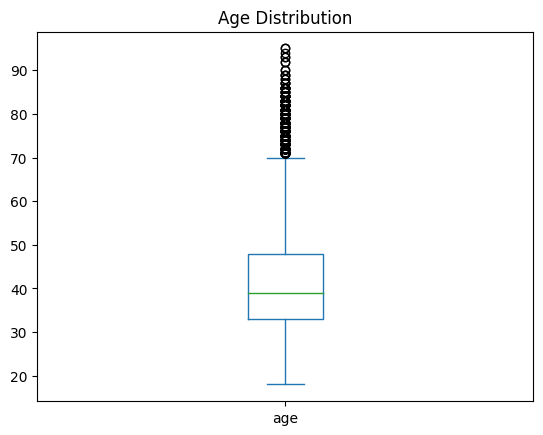

In [17]:
# 1. Age
# Viewing the box plot of Age
plt.title('Age Distribution')
df.age.plot.box()
plt.show()

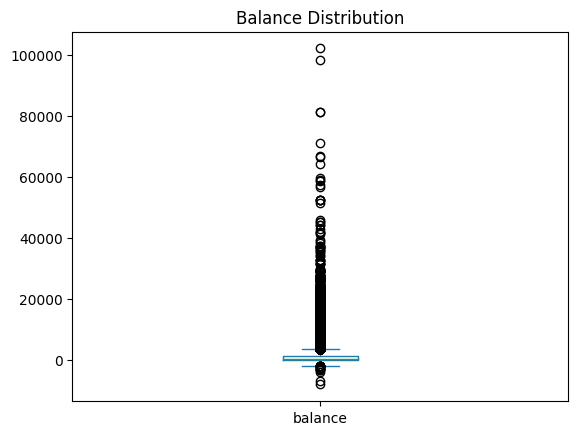

In [18]:
# 2. Balance
plt.title('Balance Distribution')
df.balance.plot.box()
plt.show()

In [19]:
# Viewing the number of people with more than 40 k average balance
df[df.balance > 40000].shape

(28, 15)

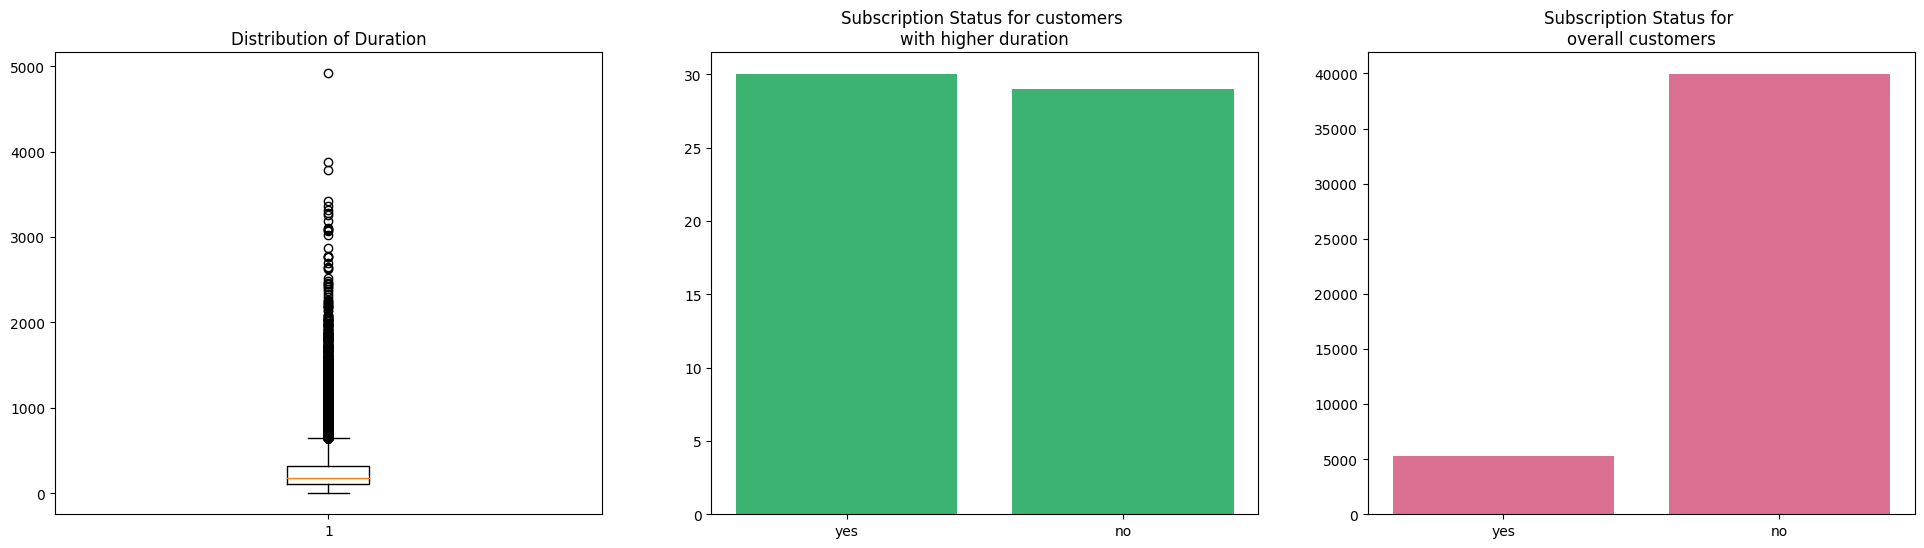

In [20]:
# Creating sub plots
fig,axes = plt.subplots(1,3,figsize = [24,6])

# 3. Duration
axes[0].boxplot(df.duration)
axes[0].set_title('Distribution of Duration')

# Plotting first chart for Subscription Status of customer duration more than 2k
data = df.y[df.duration > 2000].value_counts()
axes[1].bar(data.index, data.values, color = 'mediumseagreen')
axes[1].set_title('Subscription Status for customers \nwith higher duration')

# Plotting second chart with Subscription Status of all customers
data = df.y.value_counts()
axes[2].bar(data.index[::-1], data.values[::-1], color = 'palevioletred')
axes[2].set_title('Subscription Status for \noverall customers')

plt.show()

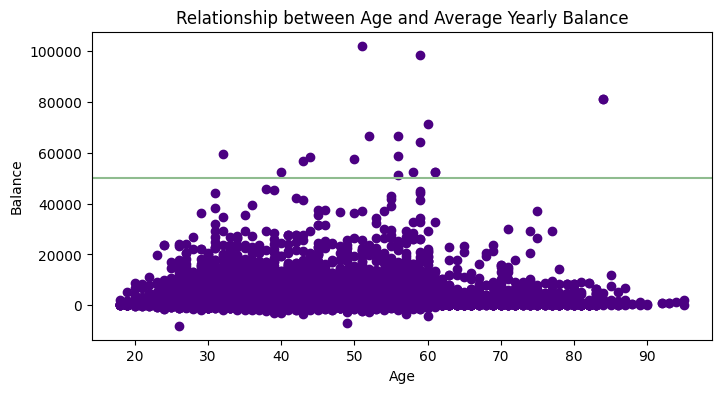

In [21]:
# 1. Age and balance
plt.figure(figsize = [8,4])
plt.title('Relationship between Age and Average Yearly Balance')
plt.scatter(df.age, df.balance, color  = 'indigo')
plt.xlabel('Age')
plt.axhline(y = 50000, color='darkseagreen')
plt.ylabel('Balance')
plt.show()


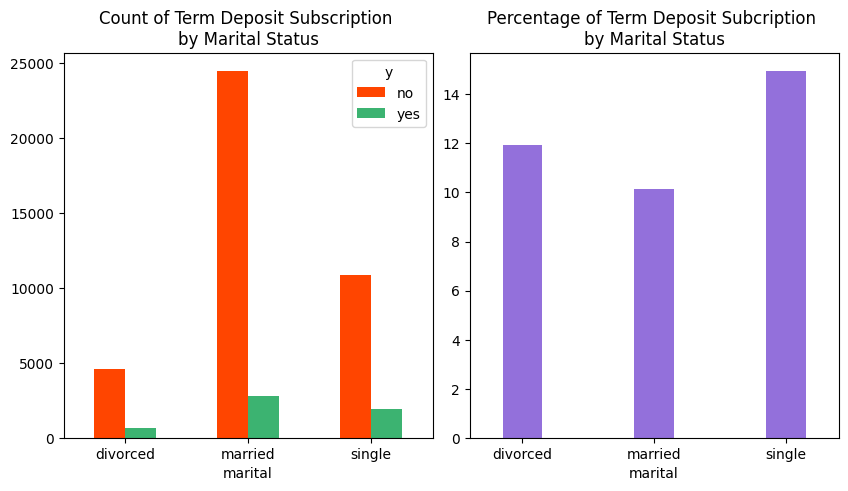

In [22]:
# 2. Marital vs term deposit subscriptions
# Creating subplots
figure, axes = plt.subplots(1,2, figsize=[10,5])

# Creating crosstab table
bary = pd.crosstab(df.marital , df.y)

# Visualizing the table
bary.plot.bar(ax=axes[0],color = ['orangered' , 'mediumseagreen'])
axes[0].set_title('Count of Term Deposit Subscription \nby Marital Status')
axes[0].set_xticklabels(bary.index, rotation = 0)


# Plotting the percentage subscription rate in each category
yes_y_marital = df.marital[df.y == 'yes'].value_counts()
desired_order = ['divorced', 'married', 'single']
yes_y_marital = yes_y_marital.reindex(desired_order, fill_value=0)
marital = df.marital.value_counts()
calculation = ((yes_y_marital / marital)*100)

# Visualizing data
calculation.plot.bar(width = 0.3, color = 'mediumpurple')
axes[1].set_title('Percentage of Term Deposit Subcription \nby Marital Status')
axes[1].set_xticklabels(yes_y_marital.index , rotation = 0)

plt.subplots_adjust(wspace=0.1) 
plt.show()

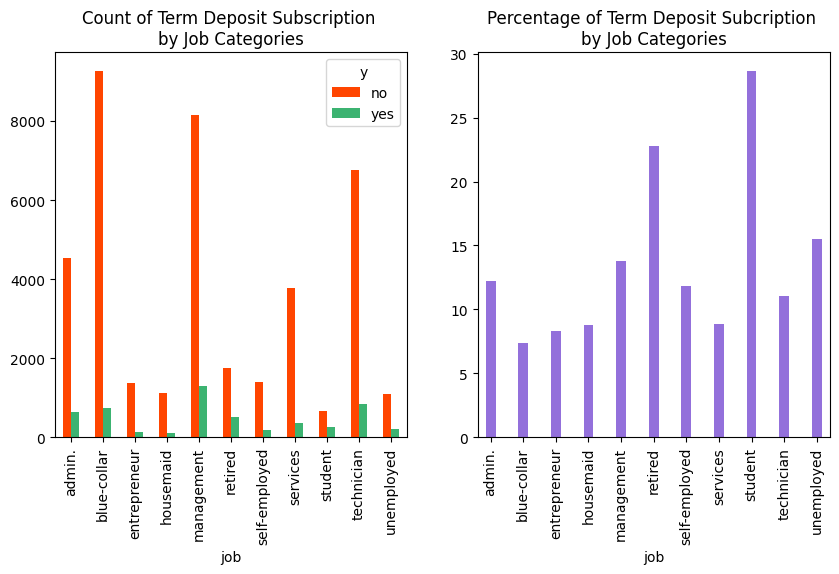

In [23]:
# 3.Job vs term deposit subscriptions
# Creating subplots
figure, axes = plt.subplots(1,2, figsize=[10,5])

# Creating crosstab table
bary = pd.crosstab(df.job , df.y)

# Visualizing the table
bary.plot.bar(ax=axes[0],color = ['orangered' , 'mediumseagreen'])
axes[0].set_title('Count of Term Deposit Subscription \nby Job Categories')
axes[0].set_xticklabels(bary.index, rotation = 90)


# Plotting the percentage subscription rate in each category
yes_y_job = df.job[df.y == 'yes'].value_counts()
desired_order = bary.index
yes_y_job= yes_y_job.reindex(desired_order, fill_value=0)
job = df.job.value_counts()
calculation = ((yes_y_job / job)*100)

# Visualizing data
calculation.plot.bar(width = 0.3, color = 'mediumpurple')
axes[1].set_title('Percentage of Term Deposit Subcription \nby Job Categories')
axes[1].set_xticklabels(yes_y_job.index , rotation = 90)

plt.show()

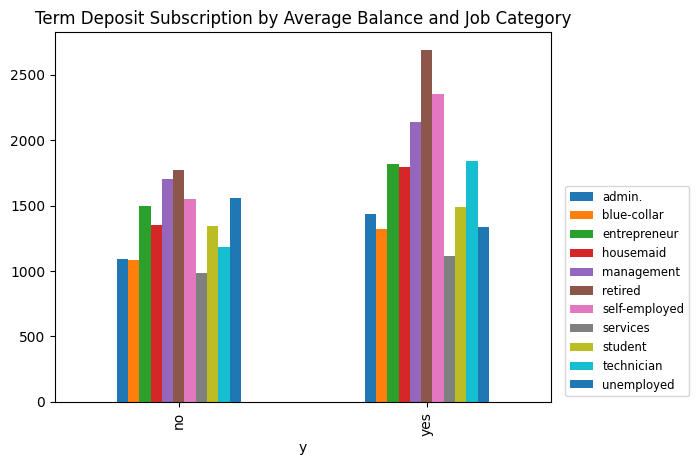

In [24]:
# 1.  Contribution of Balance and Job Titles towards Term deposit subscription
pd.pivot_table(df , values = 'balance' , index = 'y' , columns = 'job', aggfunc = 'mean').plot.bar()
plt.legend(loc='lower right',fontsize='small',bbox_to_anchor=(1.29, 0))
plt.title("Term Deposit Subscription by Average Balance and Job Category")
plt.show()

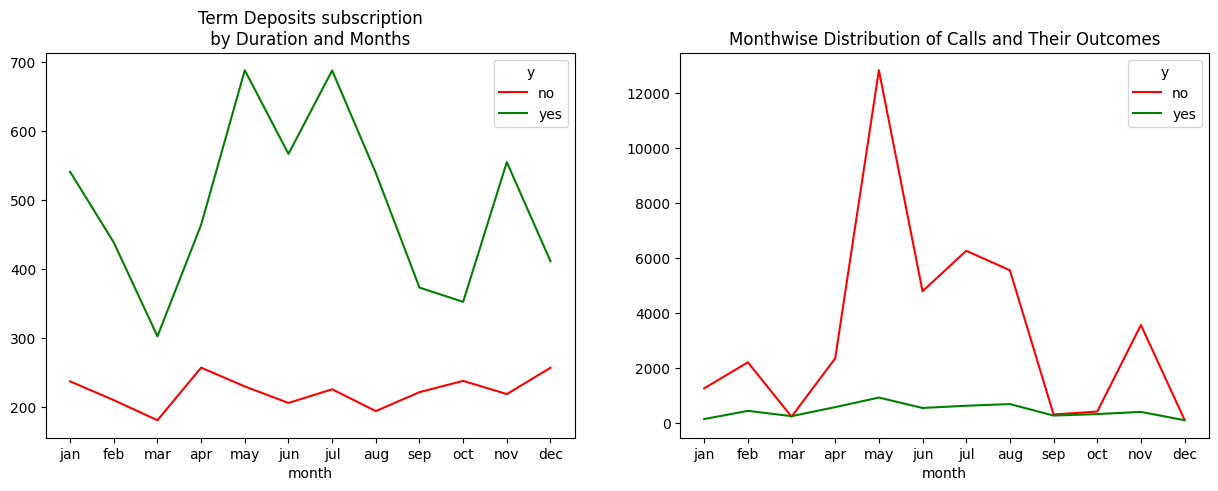

In [25]:
# 2. Plotting the duration vs the months vs the Subscription decision
figure, axes = plt.subplots(1,2 , figsize = (15,5))

#creating pivot table
md_subscription = pd.pivot_table(df, values = 'duration', columns = 'y' , index = 'month').reindex(['jan' , 'feb' , 'mar' , 'apr' , 'may' , 'jun' , 
                                                                                                    'jul' , 'aug', 'sep' , 'oct', 'nov' , 'dec'])

#Plotting the line chart of duration across months
md_subscription.plot.line(ax = axes[0],color = ['red' , 'green'])
axes[0].set_xticks( ticks = range(len(md_subscription.index)) , labels = md_subscription.index)
axes[0].set_title('Term Deposits subscription\n by Duration and Months ')

# calculating table
no_ofcalls = pd.pivot_table(df,columns = 'y' ,values = 'job', index = 'month' , aggfunc = 'count').reindex(md_subscription.index)

#plotting the table
no_ofcalls.plot.line(ax = axes[1],color = ['red' , 'green'])
axes[1].set_xticks( ticks = range(len(no_ofcalls .index)) , labels = no_ofcalls .index)
axes[1].set_title("Monthwise Distribution of Calls and Their Outcomes")

plt.show()

In [26]:
# Calculating the percentage of people spoke over 300 seconds who subscribed
print('Percentage of people with duration > 300 among the total subscription:',\
      round(df.y[(df.duration>300) &(df.y == 'yes')].shape[0]/df.y[df.y == 'yes'].shape[0]*100,2),'%')

Percentage of people with duration > 300 among the total subscription: 65.38 %


In [27]:
# Let us convert the variables with 'yes' or 'no' values to 1s and 0s
binary_var = ['housing' , 'loan' , 'default' , 'y']

# Converting the values
df[binary_var] = df[binary_var].apply(lambda x : x.map({'yes':1 , 'no' :0}))

# Verify
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,y
0,58,management,married,tertiary,0,2143,1,0,cellular,5,may,261,1,0,0
1,44,technician,single,secondary,0,29,1,0,cellular,5,may,151,1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,cellular,5,may,76,1,0,0
3,47,blue-collar,married,secondary,0,1506,1,0,cellular,5,may,92,1,0,0
4,33,blue-collar,single,secondary,0,1,0,0,cellular,5,may,198,1,0,0


In [28]:
# Converting the values
df.contact = df.contact.map({'cellular':1 , 'telephone' :0})

# Verify
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,y
0,58,management,married,tertiary,0,2143,1,0,1,5,may,261,1,0,0
1,44,technician,single,secondary,0,29,1,0,1,5,may,151,1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,1,5,may,76,1,0,0
3,47,blue-collar,married,secondary,0,1506,1,0,1,5,may,92,1,0,0
4,33,blue-collar,single,secondary,0,1,0,0,1,5,may,198,1,0,0


In [29]:
# 1. Dummy encoding for job and converting to 1s and os
dummy_job = pd.get_dummies(df.job, prefix = 'job', drop_first = True)
dummy_job = dummy_job.apply(lambda x : x.map({True:1 , False :0}))

# 2. Dummy encoding for marital and converting to 1s and os
dummy_marital = pd.get_dummies(df.marital, prefix = 'marital', drop_first = True)
dummy_marital = dummy_marital.apply(lambda x : x.map({True:1 , False :0}))

# 3. Dummy encoding for education and converting to 1s and os
dummy_edu = pd.get_dummies(df.education, prefix = 'edu').iloc[: , :-1]
dummy_edu = dummy_edu.apply(lambda x : x.map({True:1 , False :0}))

# Merging the created dataframes to the original data frames
df = pd.concat([df, dummy_job, dummy_marital, dummy_edu] , axis = 1)

# Dropping the original variables
df.drop(['job' , 'marital' , 'education'] , inplace = True , axis = 1)

# Verify
df.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,edu_primary,edu_secondary
0,58,0,2143,1,0,1,5,may,261,1,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,1,5,may,151,1,...,0,0,0,0,1,0,0,1,0,1
2,33,0,2,1,1,1,5,may,76,1,...,0,0,0,0,0,0,1,0,0,1
3,47,0,1506,1,0,1,5,may,92,1,...,0,0,0,0,0,0,1,0,0,1
4,33,0,1,0,0,1,5,may,198,1,...,0,0,0,0,0,0,0,1,0,1


In [30]:
# Function for encoding month
def month_encoder(month):

    # Creating lists of values
    numbers = [x for x in range(1,13)]
    months = ['jan' , 'feb' , 'mar' , 'apr' , 'may' , 'jun','jul' , 'aug', 'sep' , 'oct', 'nov' , 'dec']

    # Assigning the list values to create a dictionary
    month_dic ={}
    for x,y in zip(months , numbers):
        month_dic[x] = y

    # returning the month value
    return month_dic.get(month)
    
# Encoding the month column
df.month = list(map(month_encoder , df.month))

# Verify
df.info()
new_df = df.copy(deep = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                45211 non-null  int64
 1   default            45211 non-null  int64
 2   balance            45211 non-null  int64
 3   housing            45211 non-null  int64
 4   loan               45211 non-null  int64
 5   contact            45211 non-null  int64
 6   day                45211 non-null  int64
 7   month              45211 non-null  int64
 8   duration           45211 non-null  int64
 9   campaign           45211 non-null  int64
 10  previous           45211 non-null  int64
 11  y                  45211 non-null  int64
 12  job_blue-collar    45211 non-null  int64
 13  job_entrepreneur   45211 non-null  int64
 14  job_housemaid      45211 non-null  int64
 15  job_management     45211 non-null  int64
 16  job_retired        45211 non-null  int64
 17  job_self-emp

In [31]:
#new_df.to_csv('bank_clean.csv' , index = False)

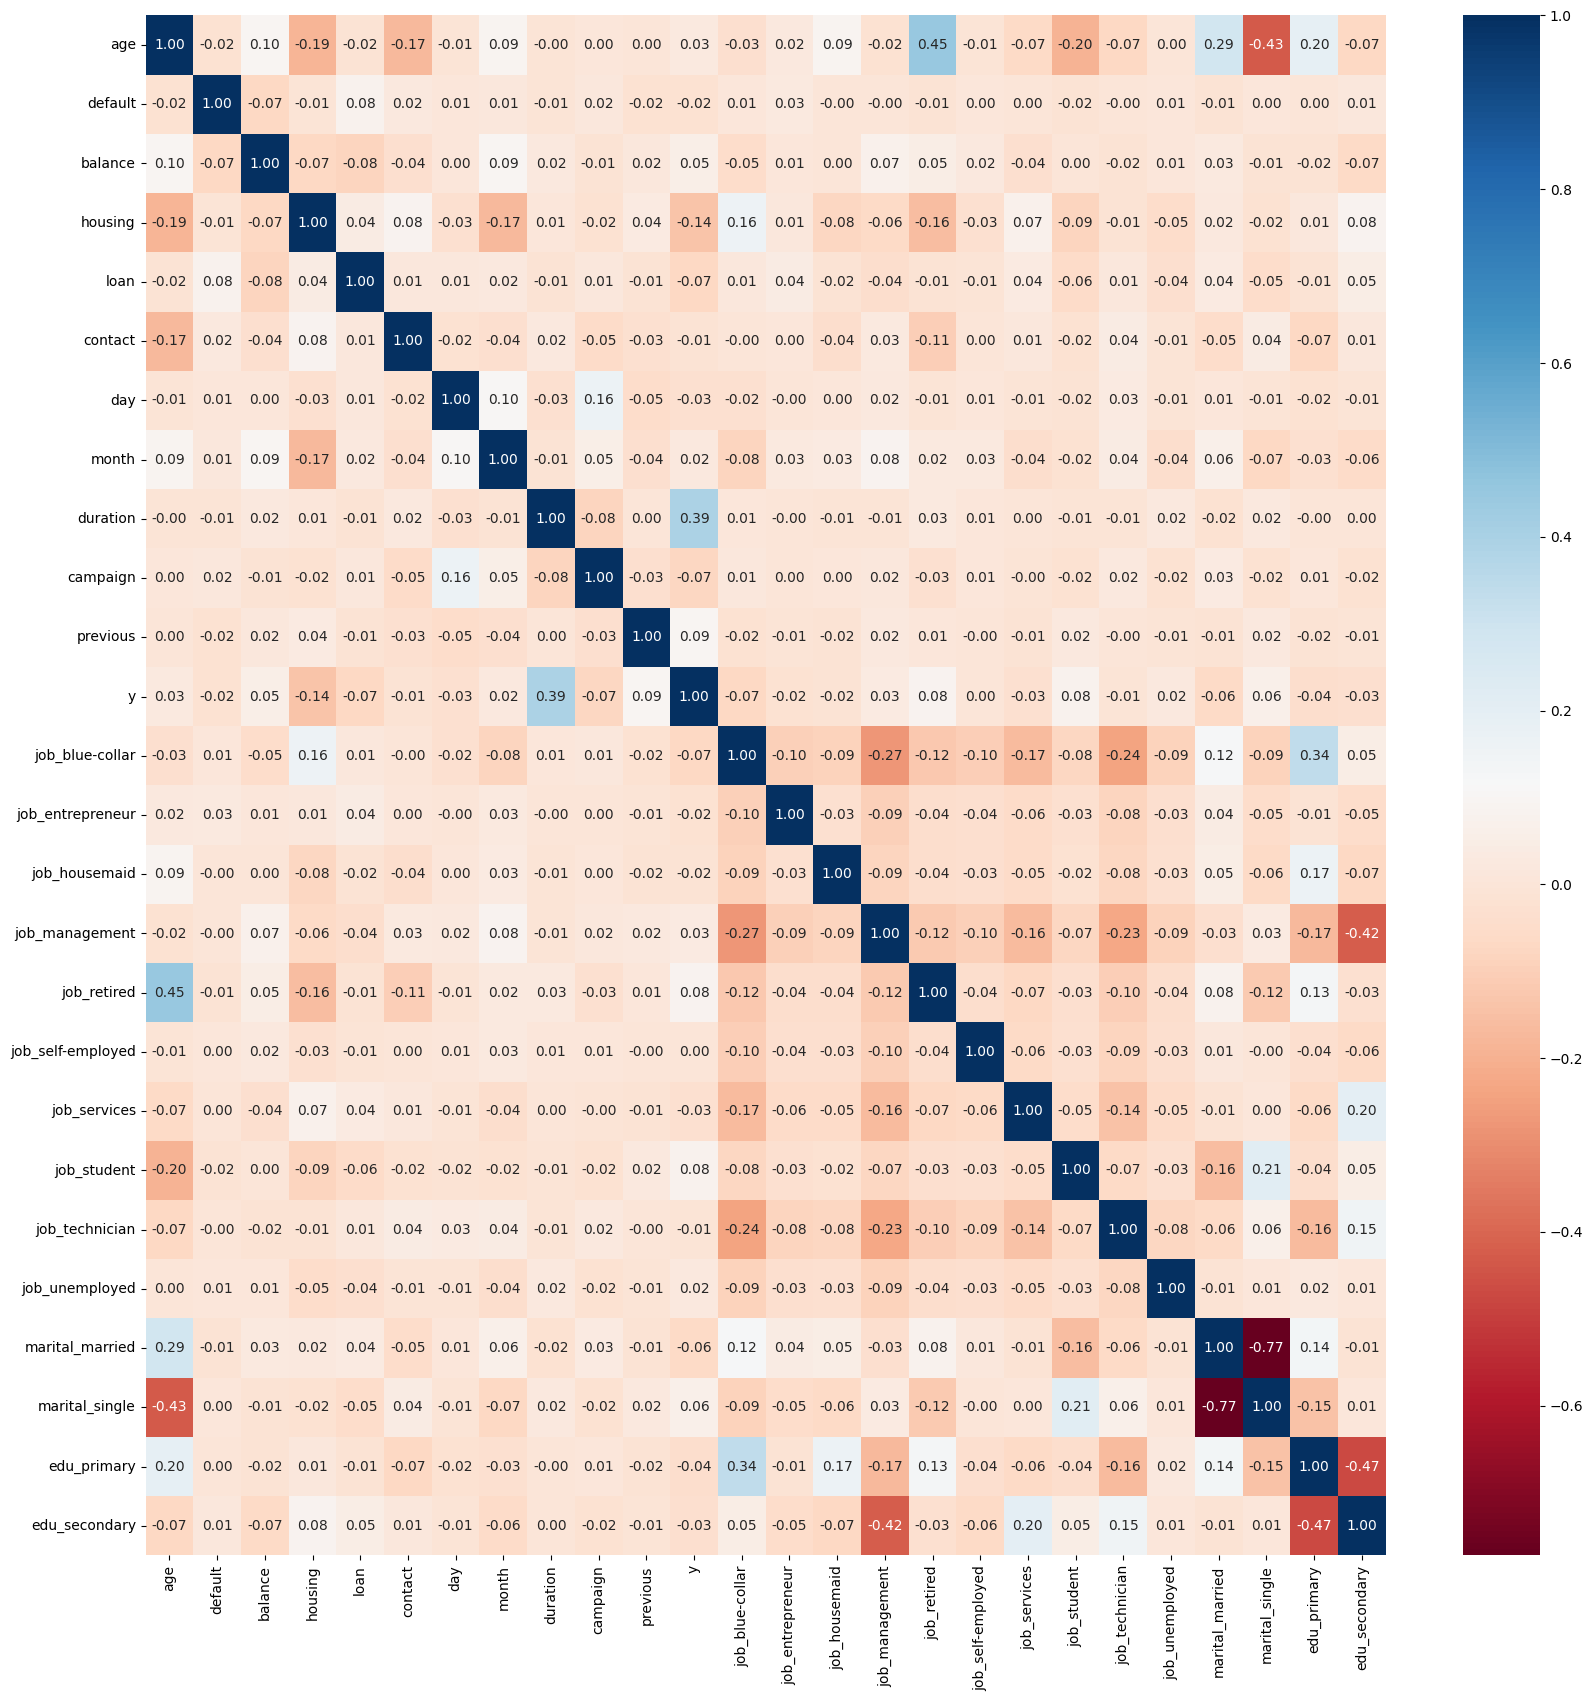

In [32]:
# Visualizing correlation among features
plt.figure(figsize = (20 , 20))
sns.heatmap(df.corr() , annot = True, cmap = 'RdBu' , fmt = '.2f')
plt.show()

In [33]:
# Importing library
from sklearn.model_selection import train_test_split

#Splitting the data
train , test = train_test_split(df , test_size = 0.25 , random_state = 31)

# Verify
print('Train data size : ' , train.shape)
print('Test data size : ' , test.shape)

Train data size :  (33908, 26)
Test data size :  (11303, 26)


In [34]:
# Splitting train data
y_train = train.pop('y')
X_train = train

# Splitting test data
y_test = test.pop('y')
X_test = test

# Verify
print('Train data size : \n X : ' , X_train.shape , 'y : ', y_train.shape, '\n')
print('Test data size : \n X : ' , X_test.shape , 'y : ', y_test.shape)

Train data size : 
 X :  (33908, 25) y :  (33908,) 

Test data size : 
 X :  (11303, 25) y :  (11303,)


In [35]:
# Viewing the subscription rate
print( 'Subscription rate : ', round((y_train[y_train== 1].shape[0]/y_train.shape[0]) , 2)*100 , '%')
y_train.value_counts()

Subscription rate :  12.0 %


y
0    29910
1     3998
Name: count, dtype: int64

In [36]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [37]:
# Importing necessary libraries
from imblearn.over_sampling import SMOTE
from collections import Counter

# Viewing imbalance
counter = Counter(y_train)
print('Before Sampling :' , counter)

Before Sampling : Counter({0: 29910, 1: 3998})


In [38]:
# Over sampling the Class 1 in train dataset using SMOTE
smt = SMOTE()

# Fitting the data
X_train, y_train = smt.fit_resample(X_train, y_train)

# Viewing imbalance
counter = Counter(y_train)
print('After Sampling :' , counter)

After Sampling : Counter({1: 29910, 0: 29910})


In [39]:
# Importing libraries
from sklearn.tree import DecisionTreeClassifier

# Model 1
# Instantiating the algorithm
dt = DecisionTreeClassifier(max_depth = 3, random_state=31 )

#Fitting the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=31)

In [40]:
# Importing libraries for decision tree visualization
# Installing pydotplus 
!pip install pydotplus
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

In [ ]:
# Standard code for decision tree visualization
dot_data = StringIO()

export_graphviz(dt ,out_file = dot_data , filled = True ,  rounded = True , \
                feature_names = ['age', 'default', 'balance', 'housing', 'loan', 'contact', 'day','month', 'duration', 'campaign', 'previous', 
                                 'job_blue-collar','job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired','job_self-employed', 
                                 'job_services', 'job_student', 'job_technician','job_unemployed', 'marital_married', 'marital_single', 
                                 'edu_primary','edu_secondary'], class_names = ['Not Subscribed' , 'Subscribed'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

In [42]:
# Import libraries for metrics
from sklearn.metrics import accuracy_score, confusion_matrix

# Predicting the target variable on train set
y_train_pred = dt.predict(X_train)

# Accuracy on training data
print('Accuracy: ', round(accuracy_score(y_train , y_train_pred)*100 , 2) , '%')

#viewing the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

print('Confusion matrix : \n' , cm)

Accuracy:  82.25 %
Confusion matrix : 
 [[23981  5929]
 [ 4691 25219]]


In [43]:
# Importing library
from sklearn.metrics import classification_report

# Viewing the classification report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82     29910
           1       0.81      0.84      0.83     29910

    accuracy                           0.82     59820
   macro avg       0.82      0.82      0.82     59820
weighted avg       0.82      0.82      0.82     59820



In [44]:
# Predicting the target variable on test set
y_test_pred = dt.predict(X_test)

# Viewing the classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87     10012
           1       0.32      0.74      0.44      1291

    accuracy                           0.79     11303
   macro avg       0.64      0.77      0.66     11303
weighted avg       0.89      0.79      0.82     11303



In [45]:
# Importing necessary library
from sklearn.model_selection import GridSearchCV

# Defining the model
model = DecisionTreeClassifier(random_state = 31)

# Defining the parameter grid
param_grid = {'max_depth': [3, 5, 7, 10],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],'max_features': [None, 'sqrt', 'log2'],
              'criterion': ['gini', 'entropy']}

# Setting up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fitting the model
grid_search.fit(X_train, y_train)

# Viewing the best parameters
best_params = grid_search.best_params_
print('Best parameters chosen by GridSearchCV : \n')
print(best_params)

Best parameters chosen by GridSearchCV : 

{'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# Model 2 - Building a model with suggestion from GridSearchCV
# Instantiating the algorithm
dt_2 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 7, random_state=31, max_features = None , min_samples_leaf = 2 , min_samples_split = 10)

#Fitting the model
dt_2 = dt_2.fit(X_train, y_train)

# Predicting the target variable on train set
y_train_pred_2 = dt_2.predict(X_train)

# Predicting the target variable on test set
y_test_pred_2 = dt_2.predict(X_test)

# Accuracy on training data
print('Accuracy on Train set: ', round(accuracy_score(y_train , y_train_pred_2)*100 , 2) , '%')

# Accuracy on test data
print('Accuracy on Test set: ', round(accuracy_score(y_test , y_test_pred_2)*100,2) , '%')


# Printing the classification report of Train and test dataset
print('Train report : \n', classification_report(y_train, y_train_pred_2))

print(' Test report : \n' ,classification_report(y_test, y_test_pred_2))

Accuracy on Train set:  86.33 %
Accuracy on Test set:  81.85 %
Train report : 
               precision    recall  f1-score   support

           0       0.88      0.84      0.86     29910
           1       0.84      0.89      0.87     29910

    accuracy                           0.86     59820
   macro avg       0.86      0.86      0.86     59820
weighted avg       0.86      0.86      0.86     59820

 Test report : 
               precision    recall  f1-score   support

           0       0.96      0.83      0.89     10012
           1       0.36      0.73      0.48      1291

    accuracy                           0.82     11303
   macro avg       0.66      0.78      0.68     11303
weighted avg       0.89      0.82      0.84     11303



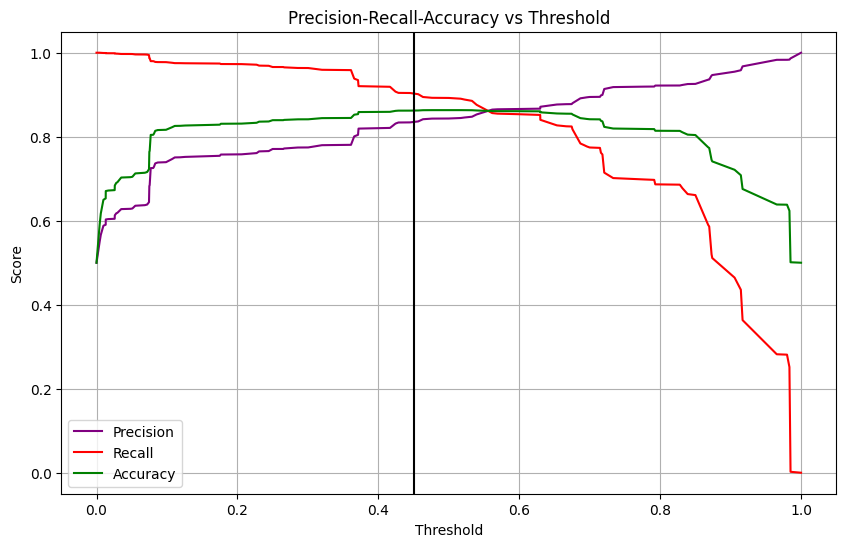

In [ ]:
#Importing library
from sklearn.metrics import precision_recall_curve

# Collecting probabilities
y_scores = dt_2.predict_proba(X_train)[:, 1]

# Collecting precision, recall, and thresholds
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

accuracies = []
for threshold in thresholds:
    y_pred = (y_scores >= threshold).astype(int)
    accuracies.append(accuracy_score(y_train, y_pred))

# Plotingt the Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], label='Precision' , color = 'purple')
plt.plot(thresholds, recalls[:-1], label='Recall' , color = 'red')
plt.plot(thresholds, accuracies, label='Accuracy', color='green')
plt.axvline(x = 0.45 , color = 'black')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall-Accuracy vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Choosing the optimal threshold
optimal_threshold = 0.45

# Collecting the theshold
y_scores_threshold = dt_2.predict_proba(X_train)[:, 1]

# Converting the predicted probabilities into binary values based on threshold
y_train_pred_threshold = (y_scores_threshold >= optimal_threshold).astype(int)

#Viewing the classification report
print('Train data:')
print(classification_report(y_train , y_train_pred_threshold))

Train data:
              precision    recall  f1-score   support

           0       0.89      0.82      0.86     29910
           1       0.84      0.90      0.87     29910

    accuracy                           0.86     59820
   macro avg       0.86      0.86      0.86     59820
weighted avg       0.86      0.86      0.86     59820



In [ ]:
# Collecting the theshold
y_scores_threshold = dt_2.predict_proba(X_test)[:, 1]

# Converting the predicted probabilities into binary values based on threshold
y_test_pred_threshold = (y_scores_threshold >= optimal_threshold).astype(int)

#Viewing the classification report
print('Testdata:')
print(classification_report(y_test , y_test_pred_threshold))

Testdata:
              precision    recall  f1-score   support

           0       0.96      0.82      0.89     10012
           1       0.35      0.77      0.48      1291

    accuracy                           0.81     11303
   macro avg       0.66      0.79      0.68     11303
weighted avg       0.89      0.81      0.84     11303



In [ ]:
# Importing test data set
final_test = pd.read_csv(r"C:\Users\JOY\Downloads\archive\Test.csv")

# Dropping unnecessary columns
final_test.drop( ['poutcome' , 'pdays'], inplace = True, axis = 1)

# Converting 'unknown' values to null values
col = final_test.columns

for column in col:
    final_test[column].replace('unknown', np.nan, inplace=True)

# Viewing percentage of missing values
round((final_test.isnull().sum()[final_test.isnull().sum()>0]*100)/final_test.shape[0],2)

job           0.84
education     4.14
contact      29.29
dtype: float64

In [ ]:


# Imputing the missing values
final_test.loc[final_test['job'].isna() , 'job'] = 'blue-collar'
final_test.loc[final_test['education'].isna() , 'education'] = 'secondary'
final_test.loc[final_test.contact.isnull(), 'contact'] = 'cellular'

# Verify
# Viewing percentage of missing values
round((final_test.isnull().sum()[final_test.isnull().sum()>0]*100)/final_test.shape[0],2)

Series([], dtype: float64)

In [ ]:
# Encoding the values
# 1. month
final_test.month = list(map(month_encoder, final_test.month))

# 2. Binary variables - housing, loan, y, default
final_test[binary_var] = final_test[binary_var].apply(lambda x : x.map({'yes':1 , 'no' :0}))

# 3. job
dummy_job = pd.get_dummies(final_test.job, prefix = 'job', drop_first = True)
dummy_job = dummy_job.apply(lambda x : x.map({True:1 , False :0}))

# 4. marital
dummy_marital = pd.get_dummies(final_test.marital, prefix = 'marital', drop_first = True)
dummy_marital = dummy_marital.apply(lambda x : x.map({True:1 , False :0}))

# 5. education
dummy_edu = pd.get_dummies(final_test.education, prefix = 'edu').iloc[: , :-1]
dummy_edu = dummy_edu.apply(lambda x : x.map({True:1 , False :0}))

# 6. contact
final_test.contact = final_test.contact.map({'telephone' : 0 , 'cellular' : 1})

# Merging the created dataframes to the original data frames
final_test = pd.concat([final_test, dummy_job, dummy_marital, dummy_edu] , axis = 1)

# Dropping the original variables
final_test.drop(['job' , 'marital' , 'education'] , inplace = True , axis = 1)


# Verify
final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                4521 non-null   int64
 1   default            4521 non-null   int64
 2   balance            4521 non-null   int64
 3   housing            4521 non-null   int64
 4   loan               4521 non-null   int64
 5   contact            4521 non-null   int64
 6   day                4521 non-null   int64
 7   month              4521 non-null   int64
 8   duration           4521 non-null   int64
 9   campaign           4521 non-null   int64
 10  previous           4521 non-null   int64
 11  y                  4521 non-null   int64
 12  job_blue-collar    4521 non-null   int64
 13  job_entrepreneur   4521 non-null   int64
 14  job_housemaid      4521 non-null   int64
 15  job_management     4521 non-null   int64
 16  job_retired        4521 non-null   int64
 17  job_self-emplo

In [ ]:
# Splitting the data
y_final = final_test.pop('y')
X_final = final_test

# Verify
print('X_final :' , X_final.shape)
print('y_final : ' , y_final.shape)

X_final : (4521, 25)
y_final :  (4521,)


In [ ]:
# Predicting on test set
y_final_predict = dt_2.predict_proba(X_final)[:, 1]

# Converting the predicted probabilities into binary values based on threshold
y_final_predict = (y_final_predict >= optimal_threshold).astype(int)

#Viewing the classification report
print(classification_report(y_final , y_final_predict))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      4000
           1       0.35      0.76      0.48       521

    accuracy                           0.81      4521
   macro avg       0.65      0.79      0.68      4521
weighted avg       0.89      0.81      0.84      4521



In [ ]:
# Viewing the confusion matrix
confusion_matrix(y_final , y_final_predict)

array([[3260,  740],
       [ 127,  394]], dtype=int64)